In [1]:
import numpy as np
import logging

from signum import TimeDomainSignal
from signum.plotting import get_plotter

In [2]:
logging.basicConfig(level=logging.DEBUG)
logging.getLogger('matplotlib').setLevel(logging.WARNING)

### Data

In [3]:
s1 = TimeDomainSignal(np.random.rand(10) + 1j * np.random.rand(10), f_sampling=0.5, description='Random data')

x2 = np.arange(-1, 20, 0.1)
s2 = TimeDomainSignal(np.sin(x2) + 1j * np.cos(x2)/2, description="sinusoid", x_axis=x2, unit='V')

x3 = np.arange(20, step=0.1)
s3 = TimeDomainSignal(20 * x3 * (np.cos(x3) + 1j * np.sin(x3)), x_axis=x3, description='curl', unit='mV')

### Bode plots

DEBUG:signum.plotting.scaled_axes:Setting x unit of the axes to data x unit: s
DEBUG:signum.plotting.scaled_axes:Setting x unit of the axes to data x unit: s
DEBUG:signum.plotting.scaled_axes:Setting y unit of the axes to data y unit: V
DEBUG:signum.plotting.scaled_axes:Setting x unit of the axes to data x unit: s
DEBUG:signum.plotting.scaled_axes:Setting y unit of the axes to data y unit: mV


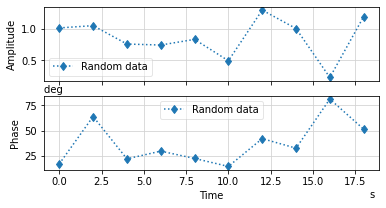

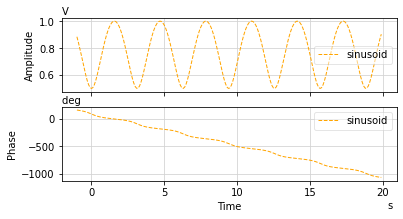

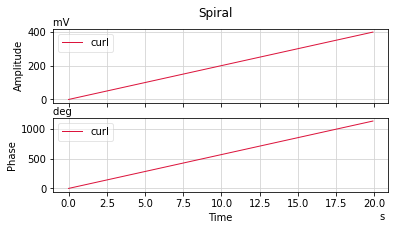

In [4]:
s1.display('bode', marker='d', linestyle=':', figsize=(6, 3))
s2.display('bode', lw=1, linestyle='--', color='orange', figsize=(6, 3), unwrapped=True)
s3.display('bode', color='crimson', lw=1, figsize=(6, 3), unwrapped=True, title='Spiral')

In [5]:
def plot_lines(plotter):
    plotter.add_line(s1, marker='d', linestyle=':')
    plotter.add_line(s2, label='sin/cos', lw=1, linestyle='--')
    plotter.add_line(s3, label='Spiral', color='crimson', lw=1)

DEBUG:signum.plotting.scaled_axes:Setting x unit of the axes to data x unit: s
DEBUG:signum.plotting.scaled_axes:Setting y unit of the axes to data y unit: V
DEBUG:signum.plotting.scaled_axes:Rescaling y data from mV to V


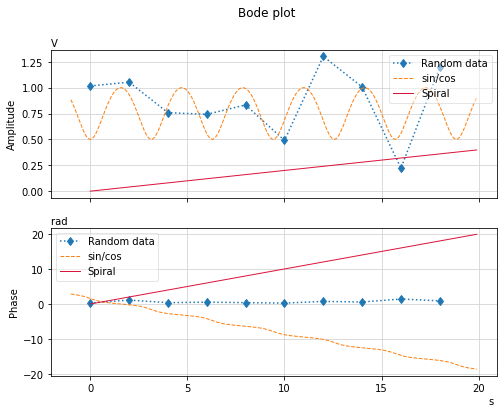

In [6]:
bode_plot = get_plotter('bode', title='Bode plot', unwrapped=True, rad=True)
plot_lines(bode_plot)

### Real & imaginary parts plot

DEBUG:signum.plotting.scaled_axes:Setting x unit of the axes to data x unit: s
DEBUG:signum.plotting.scaled_axes:Setting y unit of the axes to data y unit: V
DEBUG:signum.plotting.scaled_axes:Rescaling y data from mV to V
DEBUG:signum.plotting.scaled_axes:Rescaling y data from mV to V


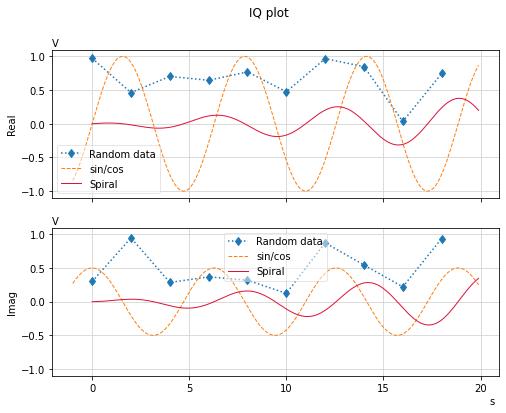

In [7]:
plot_lines(get_plotter('iq', title='IQ plot'))

### Nyquist plot

DEBUG:signum.plotting.scaled_axes:Setting x unit of the axes to data x unit: V
DEBUG:signum.plotting.scaled_axes:Setting y unit of the axes to data y unit: V
DEBUG:signum.plotting.scaled_axes:Rescaling x data from mV to V
DEBUG:signum.plotting.scaled_axes:Rescaling y data from mV to V


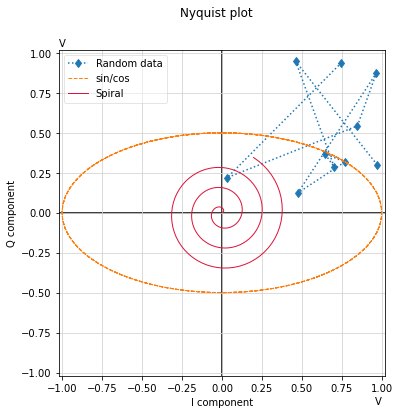

In [8]:
plot_lines(get_plotter('nyquist', title='Nyquist plot'))

### Polar plot

DEBUG:signum.plotting.scaled_axes:Setting y unit of the axes to data y unit: V
DEBUG:signum.plotting.scaled_axes:Rescaling y data from mV to V


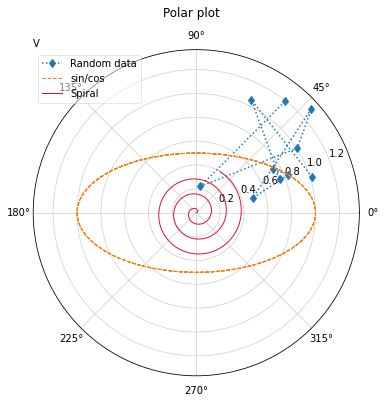

In [9]:
plot_lines(get_plotter('polar', title='Polar plot'))

DEBUG:signum.plotting.scaled_axes:Setting x unit of the axes to data x unit: s
DEBUG:signum.plotting.scaled_axes:Setting y unit of the axes to data y unit: V


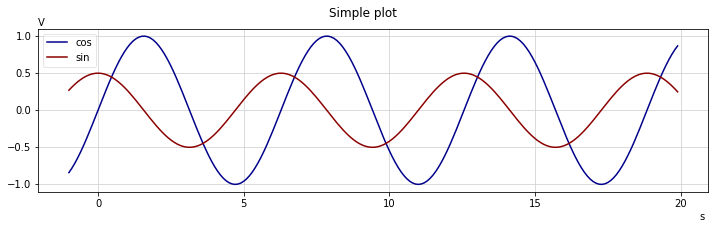

In [10]:
simple_plotter = get_plotter('simple', title='Simple plot', figsize=(12, 3))
simple_plotter.add_line(s2.real, label='cos', color='darkblue')
simple_plotter.add_line(s2.imag, label='sin', color='darkred')

### Units mismatch

In [11]:
s4 = TimeDomainSignal(np.arange(20), unit='kW')
try:
    simple_plotter.add_line(s4)
except ValueError as e:
    print("ERROR:", e)

ERROR: y units of the axes and data do not agree: ax_unit='V', data_unit='kW'


### Data units with different orders of magnitude

DEBUG:signum.plotting.scaled_axes:Setting x unit of the axes to data x unit: s
DEBUG:signum.plotting.scaled_axes:Rescaling y data from kV to V
DEBUG:signum.plotting.scaled_axes:Rescaling y data from kV to V
DEBUG:signum.plotting.scaled_axes:Rescaling x data from ms to s
DEBUG:signum.plotting.scaled_axes:Rescaling x data from ms to s


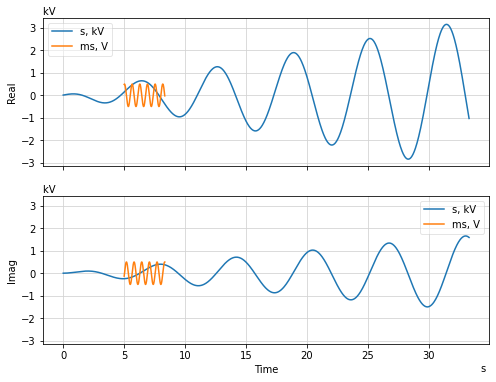

In [12]:
from signum.plotting import IQPlotter

x5 = np.arange(1000)/30
s5 = TimeDomainSignal(np.cos(x5) + 1j * np.sin(x5)/2, x_axis=x5) * (x5 + 0.1) / 10
s5.unit = 'kV'

iqp = IQPlotter(unit='V', x_label='Time')

iqp.add_line(s5, label='s, kV')


x6 = 100 * x5 + 5000
s6 = 500 * TimeDomainSignal(np.cos(0.01 * x6) + 1j * np.sin(0.01 * x6), x_axis=x6)
s6.unit = 'V'
s6.x_unit = 'ms'
iqp.add_line(s6, label='ms, V')


### Data with no units (e.g. numpy.ndarray) - assumed to fit

DEBUG:signum.plotting.scaled_axes:Setting x unit of the axes to data x unit: s
DEBUG:signum.plotting.scaled_axes:Setting y unit of the axes to data y unit: kV
DEBUG:signum.plotting.scaled_axes:x data unit not specified
DEBUG:signum.plotting.scaled_axes:y data unit not specified


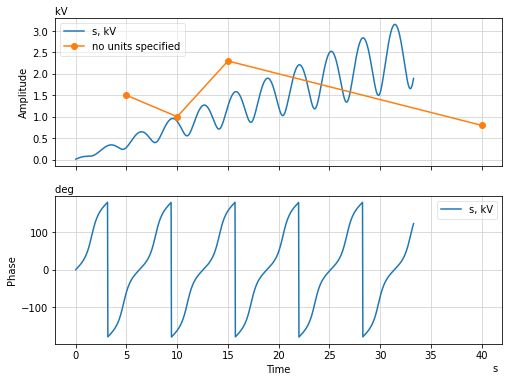

In [13]:
plot = s5.display('bode', label='s, kV')
plot.axes[0, 0].plot(np.array([5, 10, 15, 40]), [1.5, 1, 2.3, 0.8], marker='o', label='no units specified')